# Epistemic Landscapes analysis

## Setup

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
def process_df(df):
    if "redundancy" in df.columns:
        # modern csv files
        df['avg_length_of_simulation'] = (df['success_proportion'] * df['avg_time_to_peak']) + ((1 - df['success_proportion']) * df['num_timesteps'])
        df['redundancy_timeStandardized'] = df['redundancy'] / df['avg_length_of_simulation']
    else:
        # previously kept track of redundancy in a different way and needed to calculate it
        df['avg_length_of_simulation'] = (df['success_proportion'] * df['avg_time_to_peak']) + ((1 - df['success_proportion']) * df['num_timesteps'])
        df['redundancy'] = df['two+_visits'] + df['three+_visits'] + df['four+_visits'] + df['five+_visits'] + df['six+_visits'] + df['seven+_visits'] + df['eight+_visits'] + df['nine+_visits'] + df['ten+_visits']
        df['redundancy_timeStandardized'] = df['redundancy'] / df['avg_length_of_simulation']
    return df

## Figuring Out the Best Grid Size

In [1]:
grids = pd.read_csv('landscape_results/grids_bg_100.csv')

NameError: name 'pd' is not defined

In [34]:
grids

network_structure  grid_size  sigma  num_agents agent_range  num_timesteps  \
0           complete         61      1          10           5            200   
1           isolated         61      1          10           5            200   
2           complete         61      1          10          10            200   
3           isolated         61      1          10          10            200   
4           complete         61      1          10   unlimited            200   
..               ...        ...    ...         ...         ...            ...   
67          isolated        121      5          10           5            200   
68          complete        121      5          10          10            200   
69          isolated        121      5          10          10            200   
70          complete        121      5          10   unlimited            200   
71          isolated        121      5          10   unlimited            200   

    num_simulations  success_proportion  avg_time_to_peak  
0               100                0.97         50.958763  
1               100                0.87         58.275862  
2               100                1.00         44.250000  
3               100                0.99         48.828283  
4               100                0.96         43.333333  
..              ...                 ...               ...  
67              100                0.91         52.230769  
68              100                0.94         46.297872  
69              100                0.97         47.144330  
70              100                1.00         20.710000  
71              100                1.00         37.610000  

[72 rows x 9 columns]

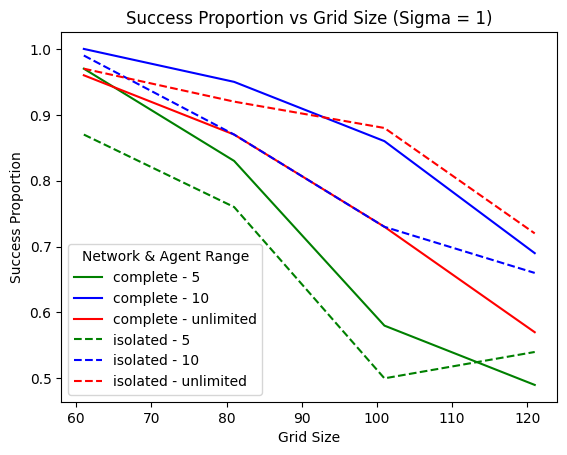

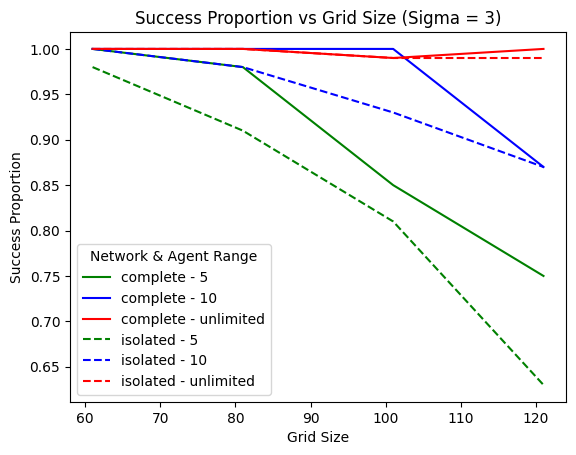

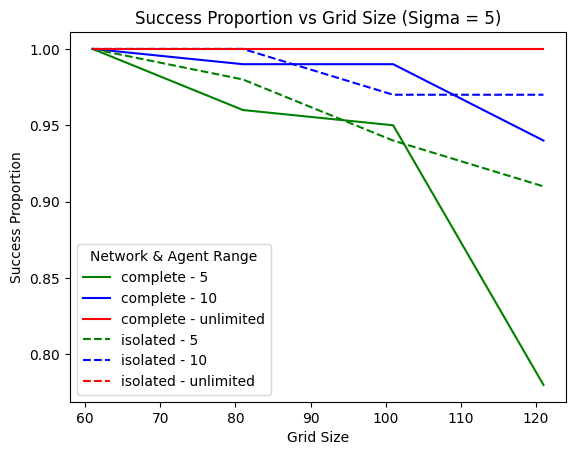

In [18]:
for s in grids["sigma"].unique():

    for ns in grids["network_structure"].unique():
        if ns == "complete":
            style = 'solid'
        else:
            style = 'dashed'
        for ar, c in zip(grids["agent_range"].unique(), ['green', 'blue', 'red']):
            subset = grids[(grids["network_structure"] == ns) & (grids["agent_range"] == ar) & (grids["sigma"] == s)]
            plt.plot(subset["grid_size"], subset["success_proportion"], label=f"{ns} - {ar}", linestyle=style, color=c)

    plt.xlabel("Grid Size")
    plt.ylabel("Success Proportion")
    plt.title(f"Success Proportion vs Grid Size (Sigma = {s})")
    plt.legend(title="Network & Agent Range")
    plt.show()

## One step vs two step algorithm

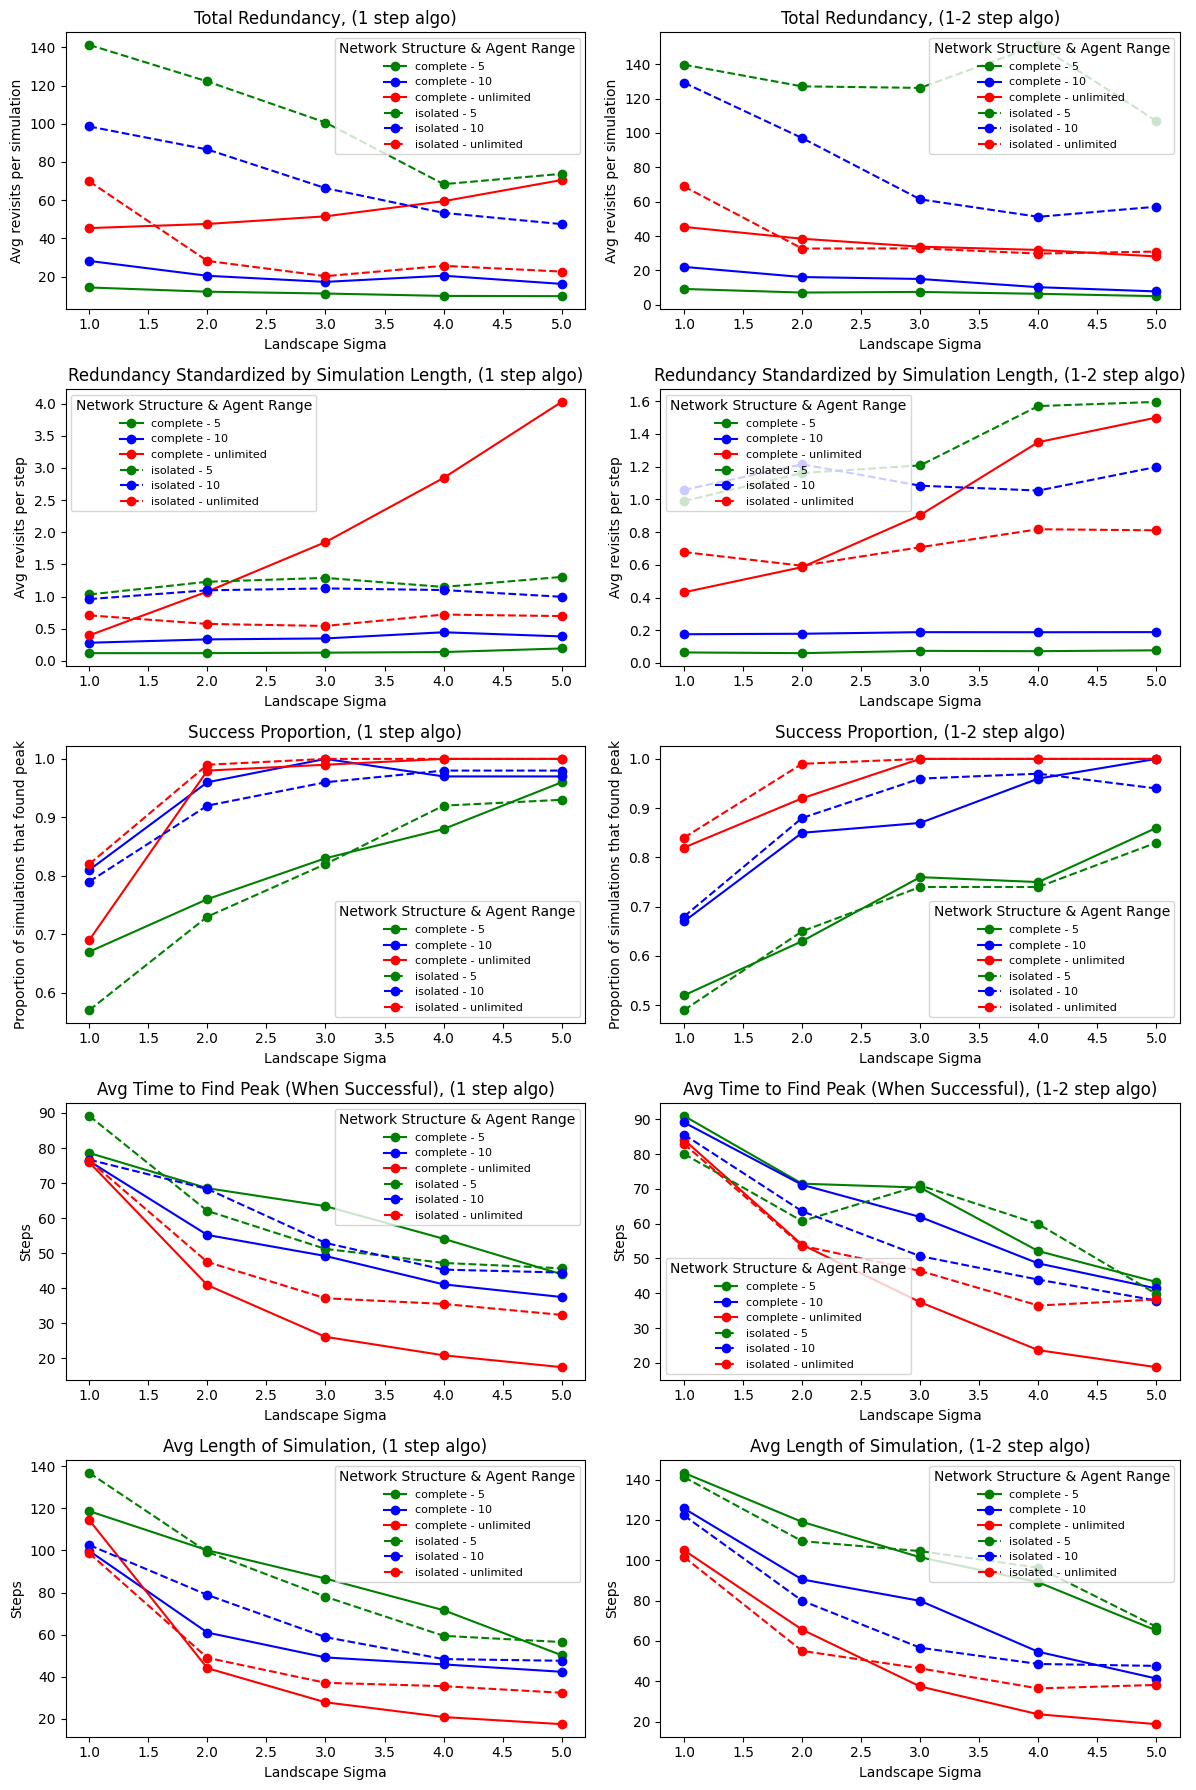

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Load both datasets
df1 = pd.read_csv('landscape_results/101grid_redundancy.csv')
df2 = pd.read_csv('landscape_results/101grid_redundancy_algo2.csv')

# Process both datasets
for df in [df1, df2]:
    df['avg_length_of_simulation'] = (df['success_proportion'] * df['avg_time_to_peak']) + ((1 - df['success_proportion']) * df['num_timesteps'])
    df['redundancy'] = df['two+_visits'] + df['three+_visits'] + df['four+_visits'] + df['five+_visits'] + df['six+_visits'] + df['seven+_visits'] + df['eight+_visits'] + df['nine+_visits'] + df['ten+_visits']
    df['redundancy_timeStandardized'] = df['redundancy'] / df['avg_length_of_simulation']

# Define metrics to plot
metrics = [
    ('redundancy', 'Avg revisits per simulation', 'Total Redundancy'),
    ('redundancy_timeStandardized', 'Avg revisits per step', 'Redundancy Standardized by Simulation Length'),
    ('success_proportion', 'Proportion of simulations that found peak', 'Success Proportion'),
    ('avg_time_to_peak', 'Steps', 'Avg Time to Find Peak (When Successful)'),
    ('avg_length_of_simulation', 'Steps', 'Avg Length of Simulation'),
]

fig, axes = plt.subplots(len(metrics), 2, figsize=(12, 18))  # 5 rows, 2 columns

for col, df in enumerate([df1, df2]):  # Iterate over both datasets
    for row, (metric, ylabel, title) in enumerate(metrics):  # Iterate over each metric
        ax = axes[row, col]
        
        for ns in df["network_structure"].unique():
            style = 'solid' if ns == "complete" else 'dashed'
            for ar, c in zip(df["agent_range"].unique(), ['green', 'blue', 'red']):
                sub_df = df[(df["network_structure"] == ns) & (df["agent_range"] == ar)]
                ax.plot(sub_df['sigma'], sub_df[metric], label=f"{ns} - {ar}", linestyle=style, color=c, marker='o')
        
        ax.set_xlabel("Landscape Sigma")
        ax.set_ylabel(ylabel)
        ax.set_title(title + (", (1 step algo)" if col == 0 else ", (1-2 step algo)"))
        ax.legend(title="Network Structure & Agent Range", fontsize=8)

plt.tight_layout()
plt.show()


i.e. what radius around the current best tile the agents will go to next

## Looking at alternative landscapes (random vs one peak)

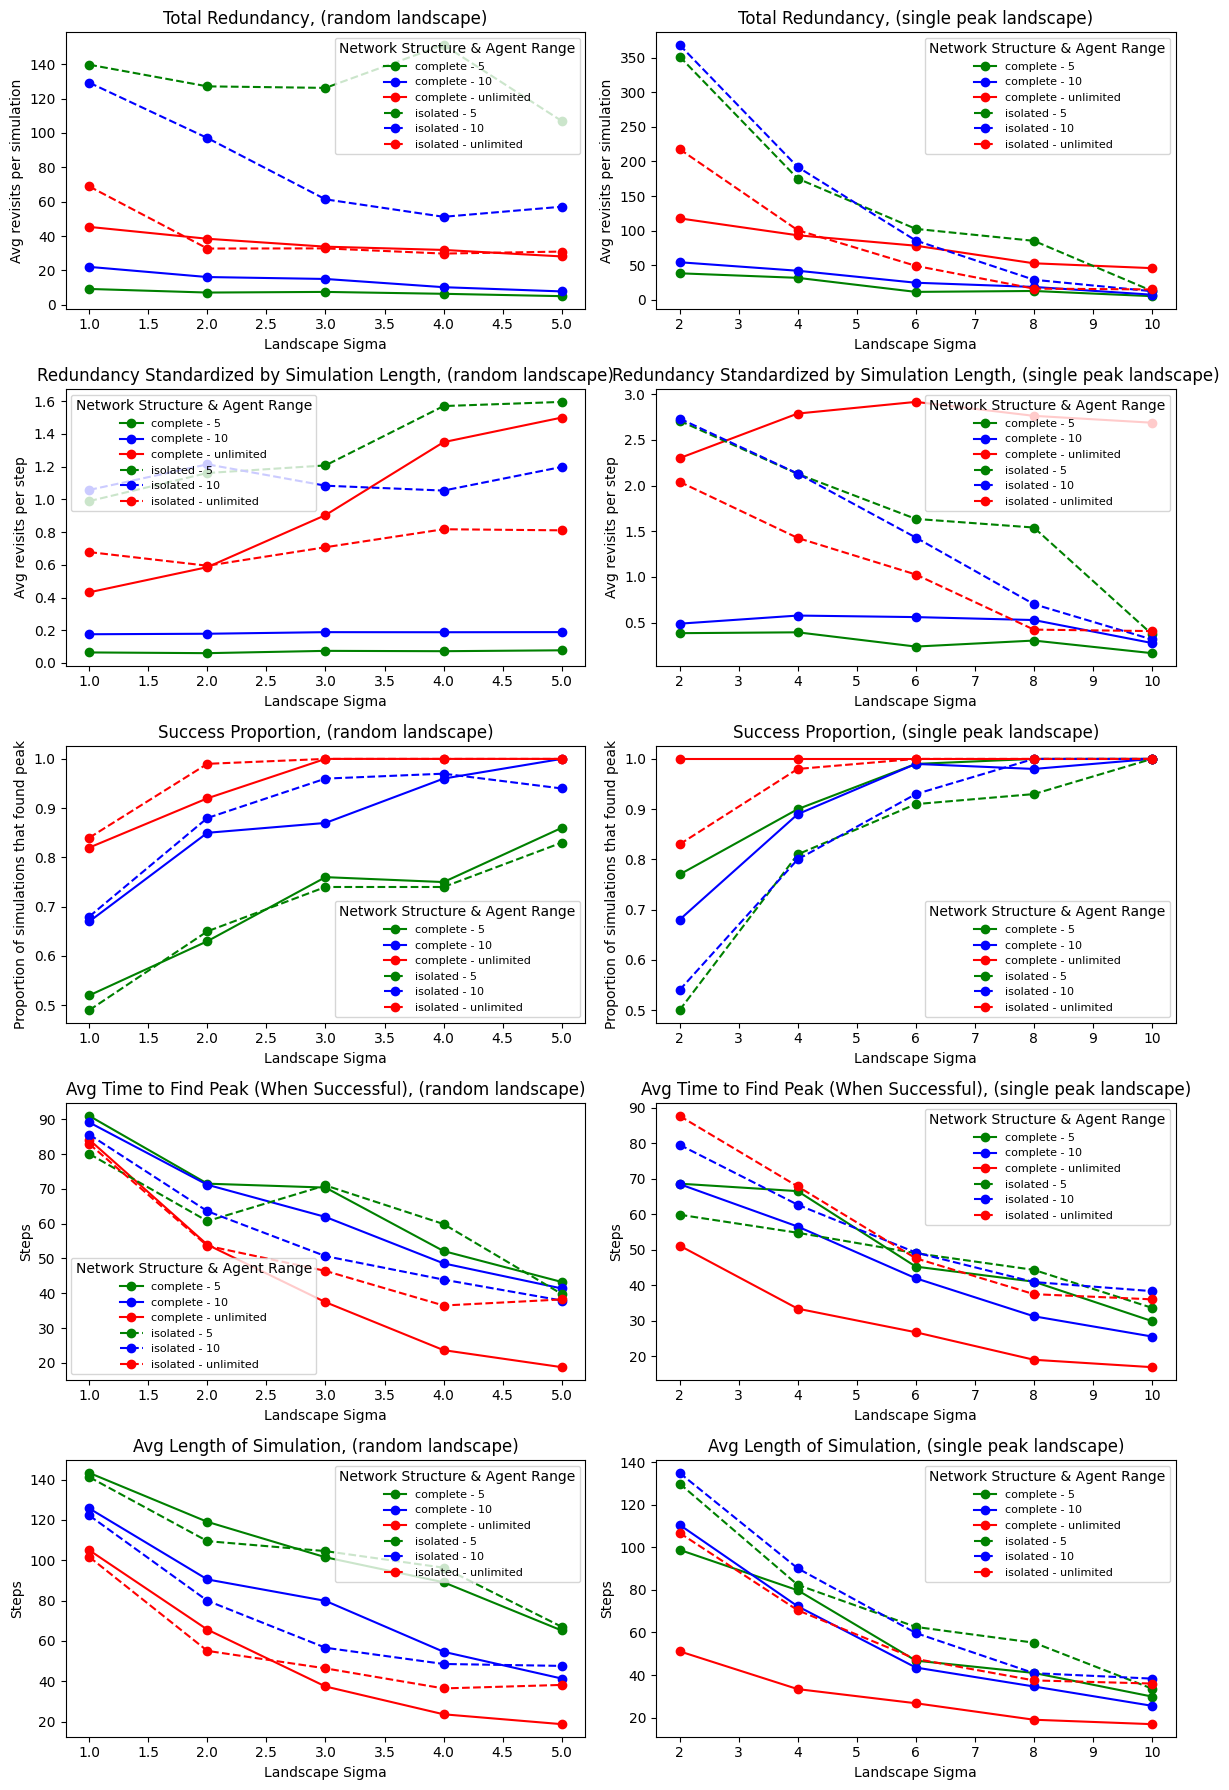

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load both datasets
df1 = pd.read_csv('landscape_results/101grid_redundancy_algo2.csv')
df2 = pd.read_csv('landscape_results/101onePeak.csv')

# Process both datasets
for df in [df1, df2]:
    df['avg_length_of_simulation'] = (df['success_proportion'] * df['avg_time_to_peak']) + ((1 - df['success_proportion']) * df['num_timesteps'])
    df['redundancy'] = df['two+_visits'] + df['three+_visits'] + df['four+_visits'] + df['five+_visits'] + df['six+_visits'] + df['seven+_visits'] + df['eight+_visits'] + df['nine+_visits'] + df['ten+_visits']
    df['redundancy_timeStandardized'] = df['redundancy'] / df['avg_length_of_simulation']

# Define metrics to plot
metrics = [
    ('redundancy', 'Avg revisits per simulation', 'Total Redundancy'),
    ('redundancy_timeStandardized', 'Avg revisits per step', 'Redundancy Standardized by Simulation Length'),
    ('success_proportion', 'Proportion of simulations that found peak', 'Success Proportion'),
    ('avg_time_to_peak', 'Steps', 'Avg Time to Find Peak (When Successful)'),
    ('avg_length_of_simulation', 'Steps', 'Avg Length of Simulation'),
]

fig, axes = plt.subplots(len(metrics), 2, figsize=(12, 18))  # 5 rows, 2 columns

for col, df in enumerate([df1, df2]):  # Iterate over both datasets
    for row, (metric, ylabel, title) in enumerate(metrics):  # Iterate over each metric
        ax = axes[row, col]
        
        for ns in df["network_structure"].unique():
            style = 'solid' if ns == "complete" else 'dashed'
            for ar, c in zip(df["agent_range"].unique(), ['green', 'blue', 'red']):
                sub_df = df[(df["network_structure"] == ns) & (df["agent_range"] == ar)]
                ax.plot(sub_df['sigma'], sub_df[metric], label=f"{ns} - {ar}", linestyle=style, color=c, marker='o')
        
        ax.set_xlabel("Landscape Sigma")
        ax.set_ylabel(ylabel)
        ax.set_title(title + (", (random landscape)" if col == 0 else ", (single peak landscape)"))
        ax.legend(title="Network Structure & Agent Range", fontsize=8)

plt.tight_layout()
plt.show()


nk
increase range
network structures

how many inferior pulls in wh

151 takes about 2.5x longer than 101 (1000 seconds vs 2700 seconds for 30 parameters with 100 runs)

## Side by side df analysis (i.e. 2 columns)

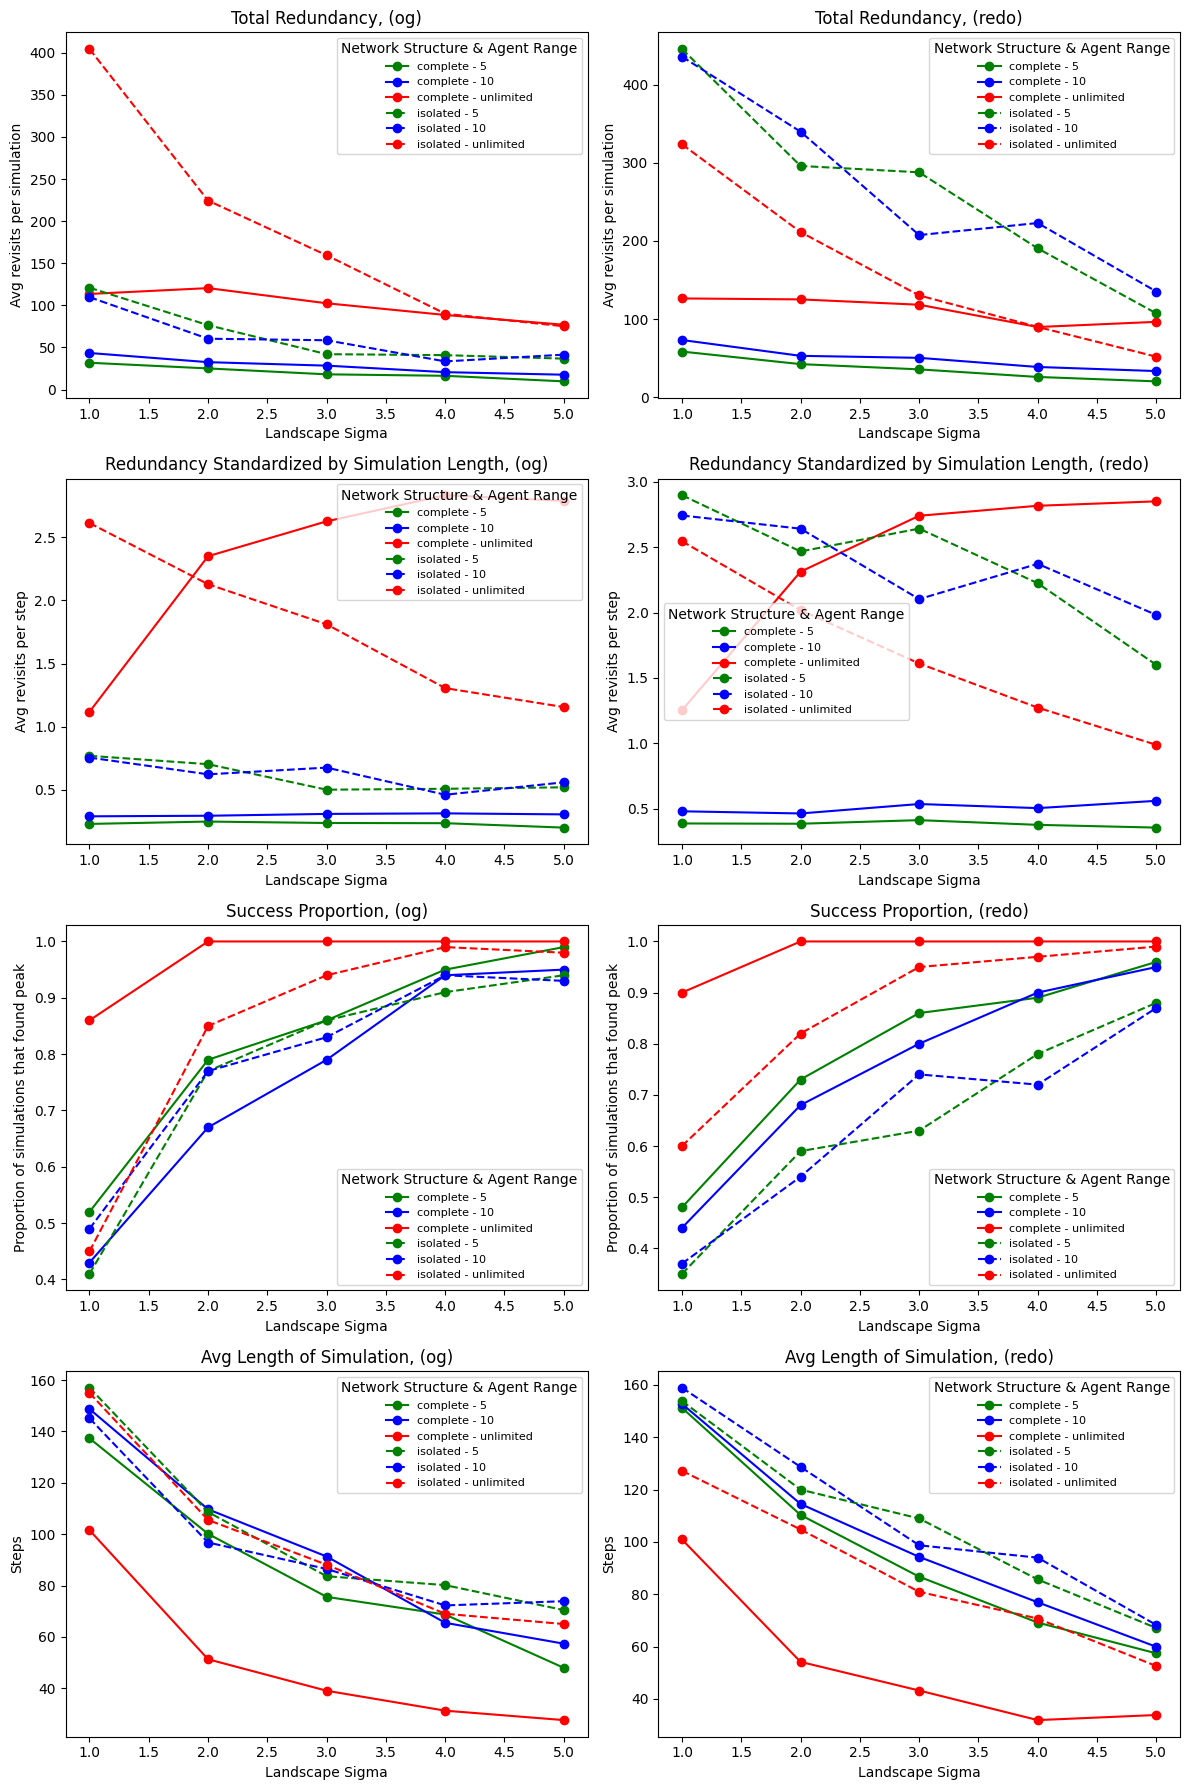

In [82]:
import pandas as pd
import matplotlib.pyplot as plt

# Load both datasets
df1 = pd.read_csv('landscape_results/timetest_101_nowrap.csv')
#df1 = pd.read_csv('landscape_results/101grid_redundancy_algo2.csv')
df1 = process_df(df1)

df2 = pd.read_csv('landscape_results/timetest_101_wrap.csv')
df2 = process_df(df2)

df0 = pd.read_csv('landscape_results/101grid_redundancy_algo2.csv')
df0 = process_df(df0)

df1 = df1[df1["agent_range"].isin(df0["agent_range"].unique())]
df2 = df2[df2["agent_range"].isin(df0["agent_range"].unique())]

# df1 = df0[df0["network_structure"] == "complete"]
# df2 = df0[df0["network_structure"] == "isolated"]

# Define metrics to plot
metrics = [
    ('redundancy', 'Avg revisits per simulation', 'Total Redundancy'),
    ('redundancy_timeStandardized', 'Avg revisits per step', 'Redundancy Standardized by Simulation Length'),
    ('success_proportion', 'Proportion of simulations that found peak', 'Success Proportion'),
    ('avg_length_of_simulation', 'Steps', 'Avg Length of Simulation'),
]

fig, axes = plt.subplots(len(metrics), 2, figsize=(12, 18))  # 5 rows, 2 columns

for col, df in enumerate([df1, df2]):  # Iterate over both datasets
    for row, (metric, ylabel, title) in enumerate(metrics):  # Iterate over each metric
        ax = axes[row, col]
        
        for ns in ["complete", "isolated"]:
            style = 'solid' if ns == "complete" else 'dashed'
            for ar, c in zip(df["agent_range"].unique(), ['green', 'blue', 'red', 'purple', 'orange', 'brown']):
                sub_df = df[(df["network_structure"] == ns) & (df["agent_range"] == ar)]
                ax.plot(sub_df['sigma'], sub_df[metric], label=f"{ns} - {ar}", linestyle=style, color=c, marker='o')
        
        ax.set_xlabel("Landscape Sigma")
        ax.set_ylabel(ylabel)
        ax.set_title(title + (", (og)" if col == 0 else ", (redo)"))
        ax.legend(title="Network Structure & Agent Range", fontsize=8)

plt.tight_layout()
plt.show()


## Exploring Agent Range Parameter

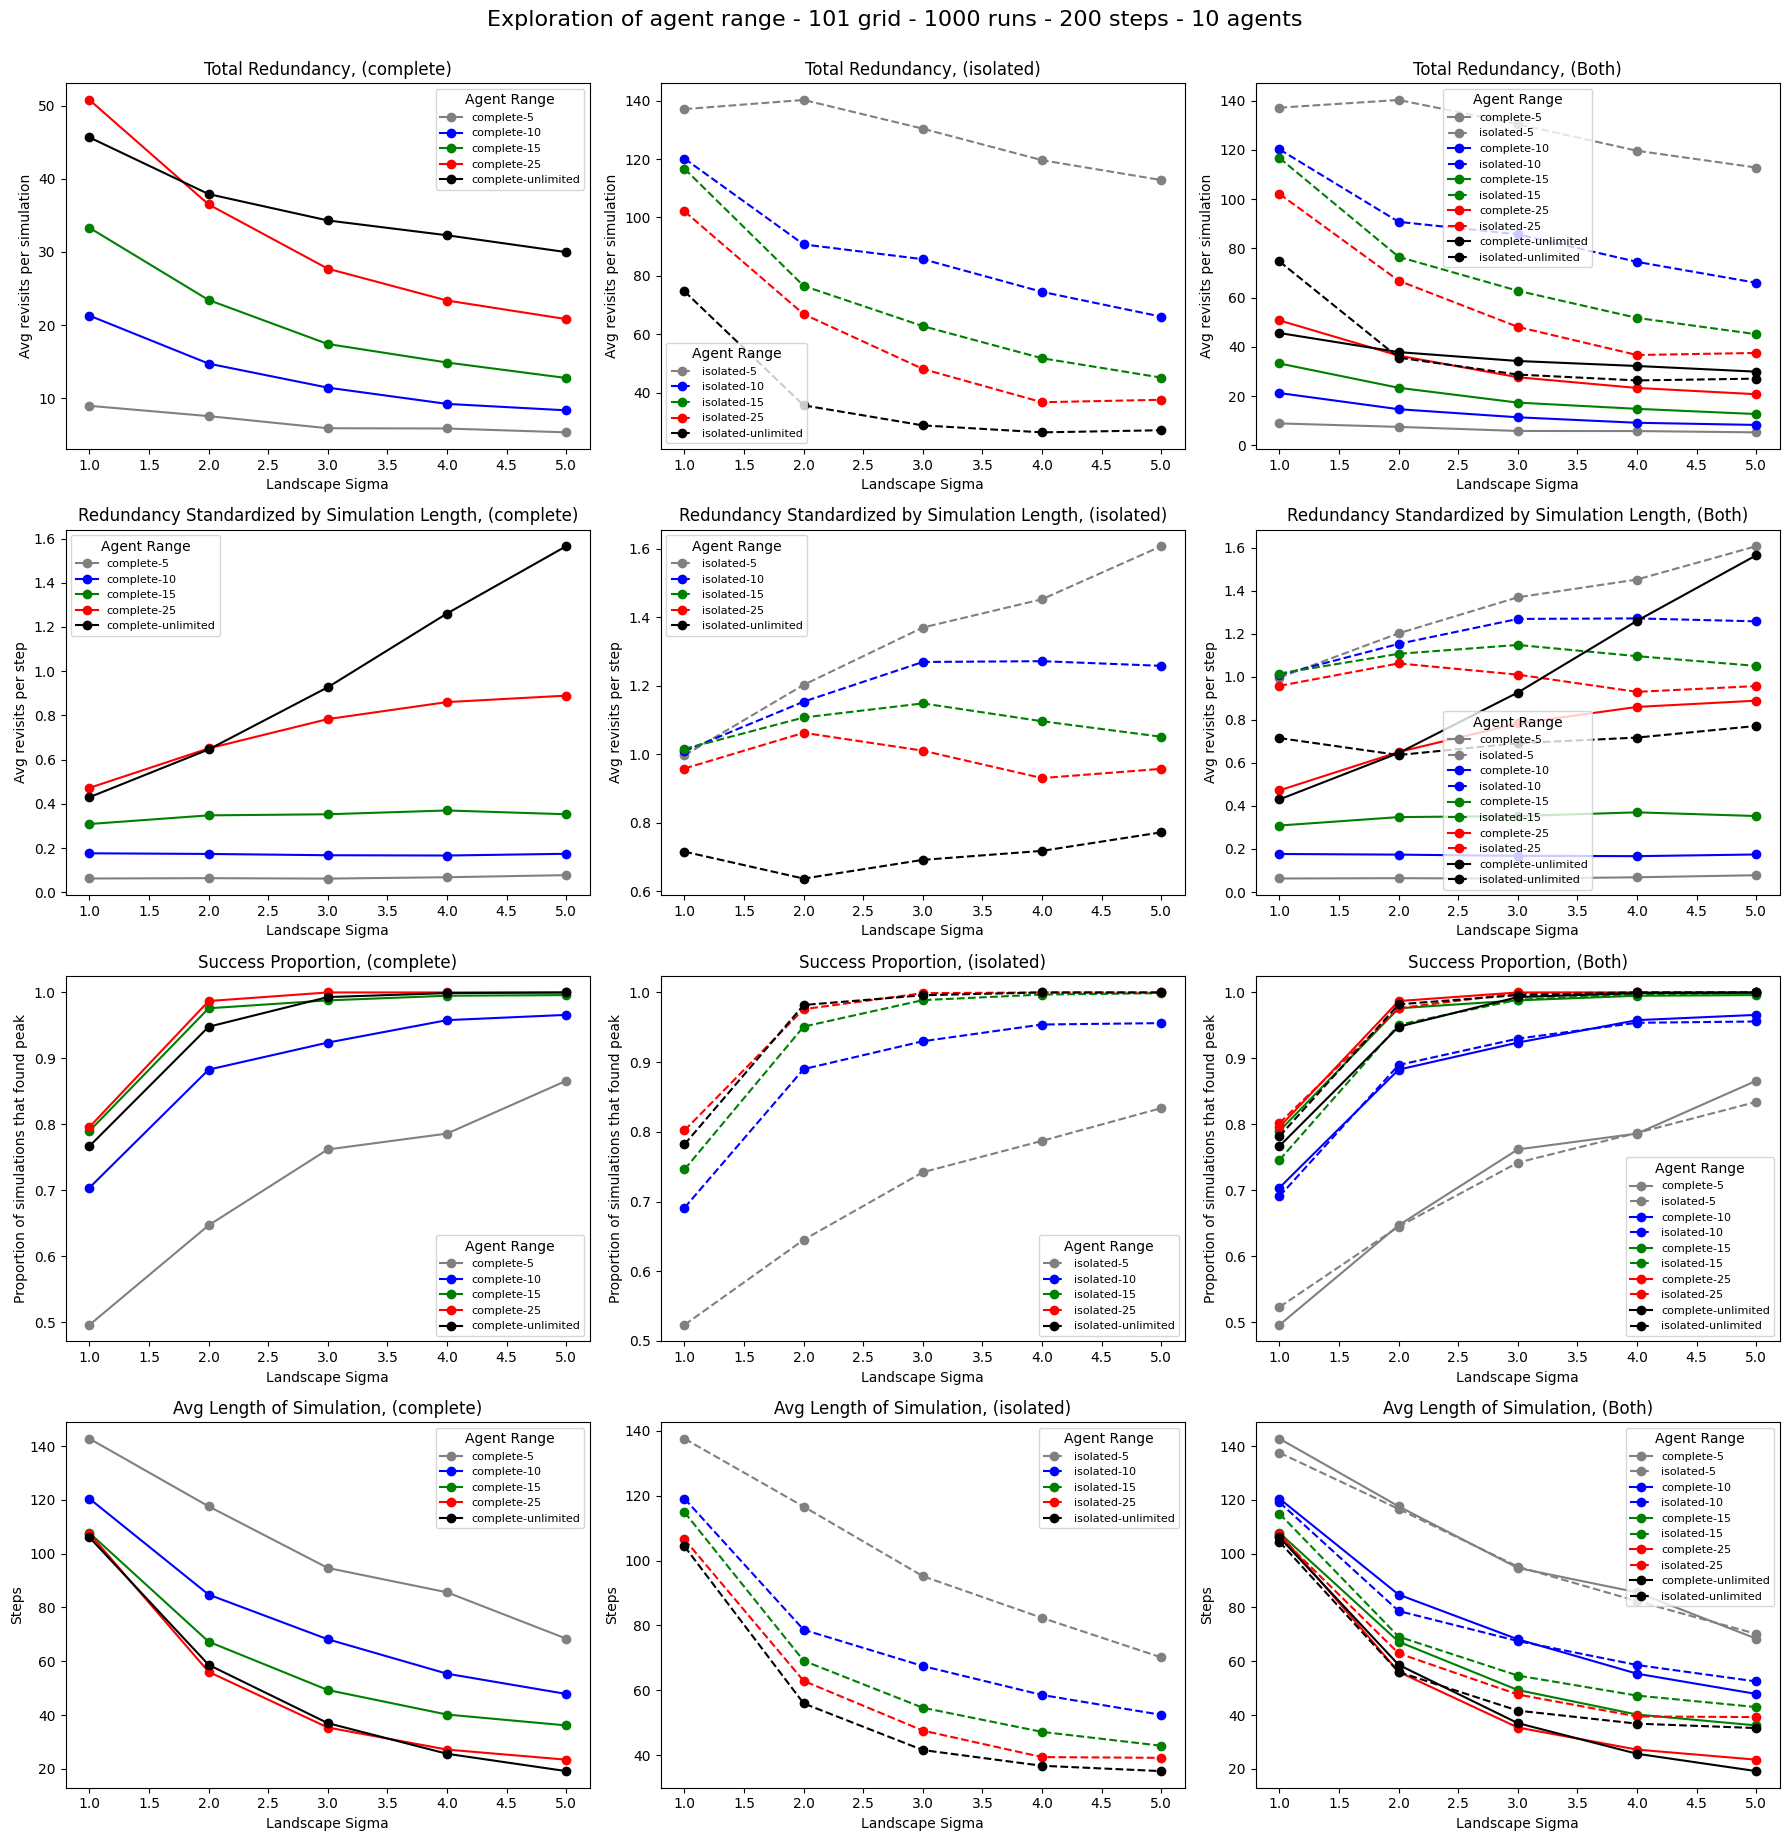

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Load and process the dataset
df0 = pd.read_csv('landscape_results/range_1000runs_redo.csv')
df0 = process_df(df0)

df1 = df0[df0["network_structure"] == "complete"]
df2 = df0[df0["network_structure"] == "isolated"]

# Define metrics to plot
metrics = [
    ('redundancy', 'Avg revisits per simulation', 'Total Redundancy'),
    ('redundancy_timeStandardized', 'Avg revisits per step', 'Redundancy Standardized by Simulation Length'),
    ('success_proportion', 'Proportion of simulations that found peak', 'Success Proportion'),
    ('avg_length_of_simulation', 'Steps', 'Avg Length of Simulation'),
]

fig, axes = plt.subplots(len(metrics), 3, figsize=(18, 18))  # 4 rows, 2 columns

for col, df in enumerate([df1, df2, df0]):  # Iterate over both datasets

    for row, (metric, ylabel, title) in enumerate(metrics):  # Iterate over each metric
        ax = axes[row, col]
        
        for ar, c in zip(['5', '10', '15', '25', 'unlimited'], ['gray', 'blue', 'green', 'red', 'black']):
            for ns, style in zip(["complete", "isolated"], ['solid', 'dashed']):
                if ns in df["network_structure"].unique():
                    sub_df = df[(df["agent_range"] == ar) & (df["network_structure"] == ns)]
                    ax.plot(sub_df['sigma'], sub_df[metric], label=f"{ns}-{ar}", linestyle=style, color=c, marker='o')
        
        ax.set_xlabel("Landscape Sigma")
        ax.set_ylabel(ylabel)
        ax.set_title(title + (", (complete)" if col == 0 else ", (isolated)" if col == 1 else ", (Both)"))
        ax.legend(title="Agent Range", fontsize=8)

plt.tight_layout()
fig.suptitle("Exploration of agent range - 101 grid - 1000 runs - 200 steps - 10 agents", fontsize=16, y=1.02)
plt.show()


## Exploring different network structures

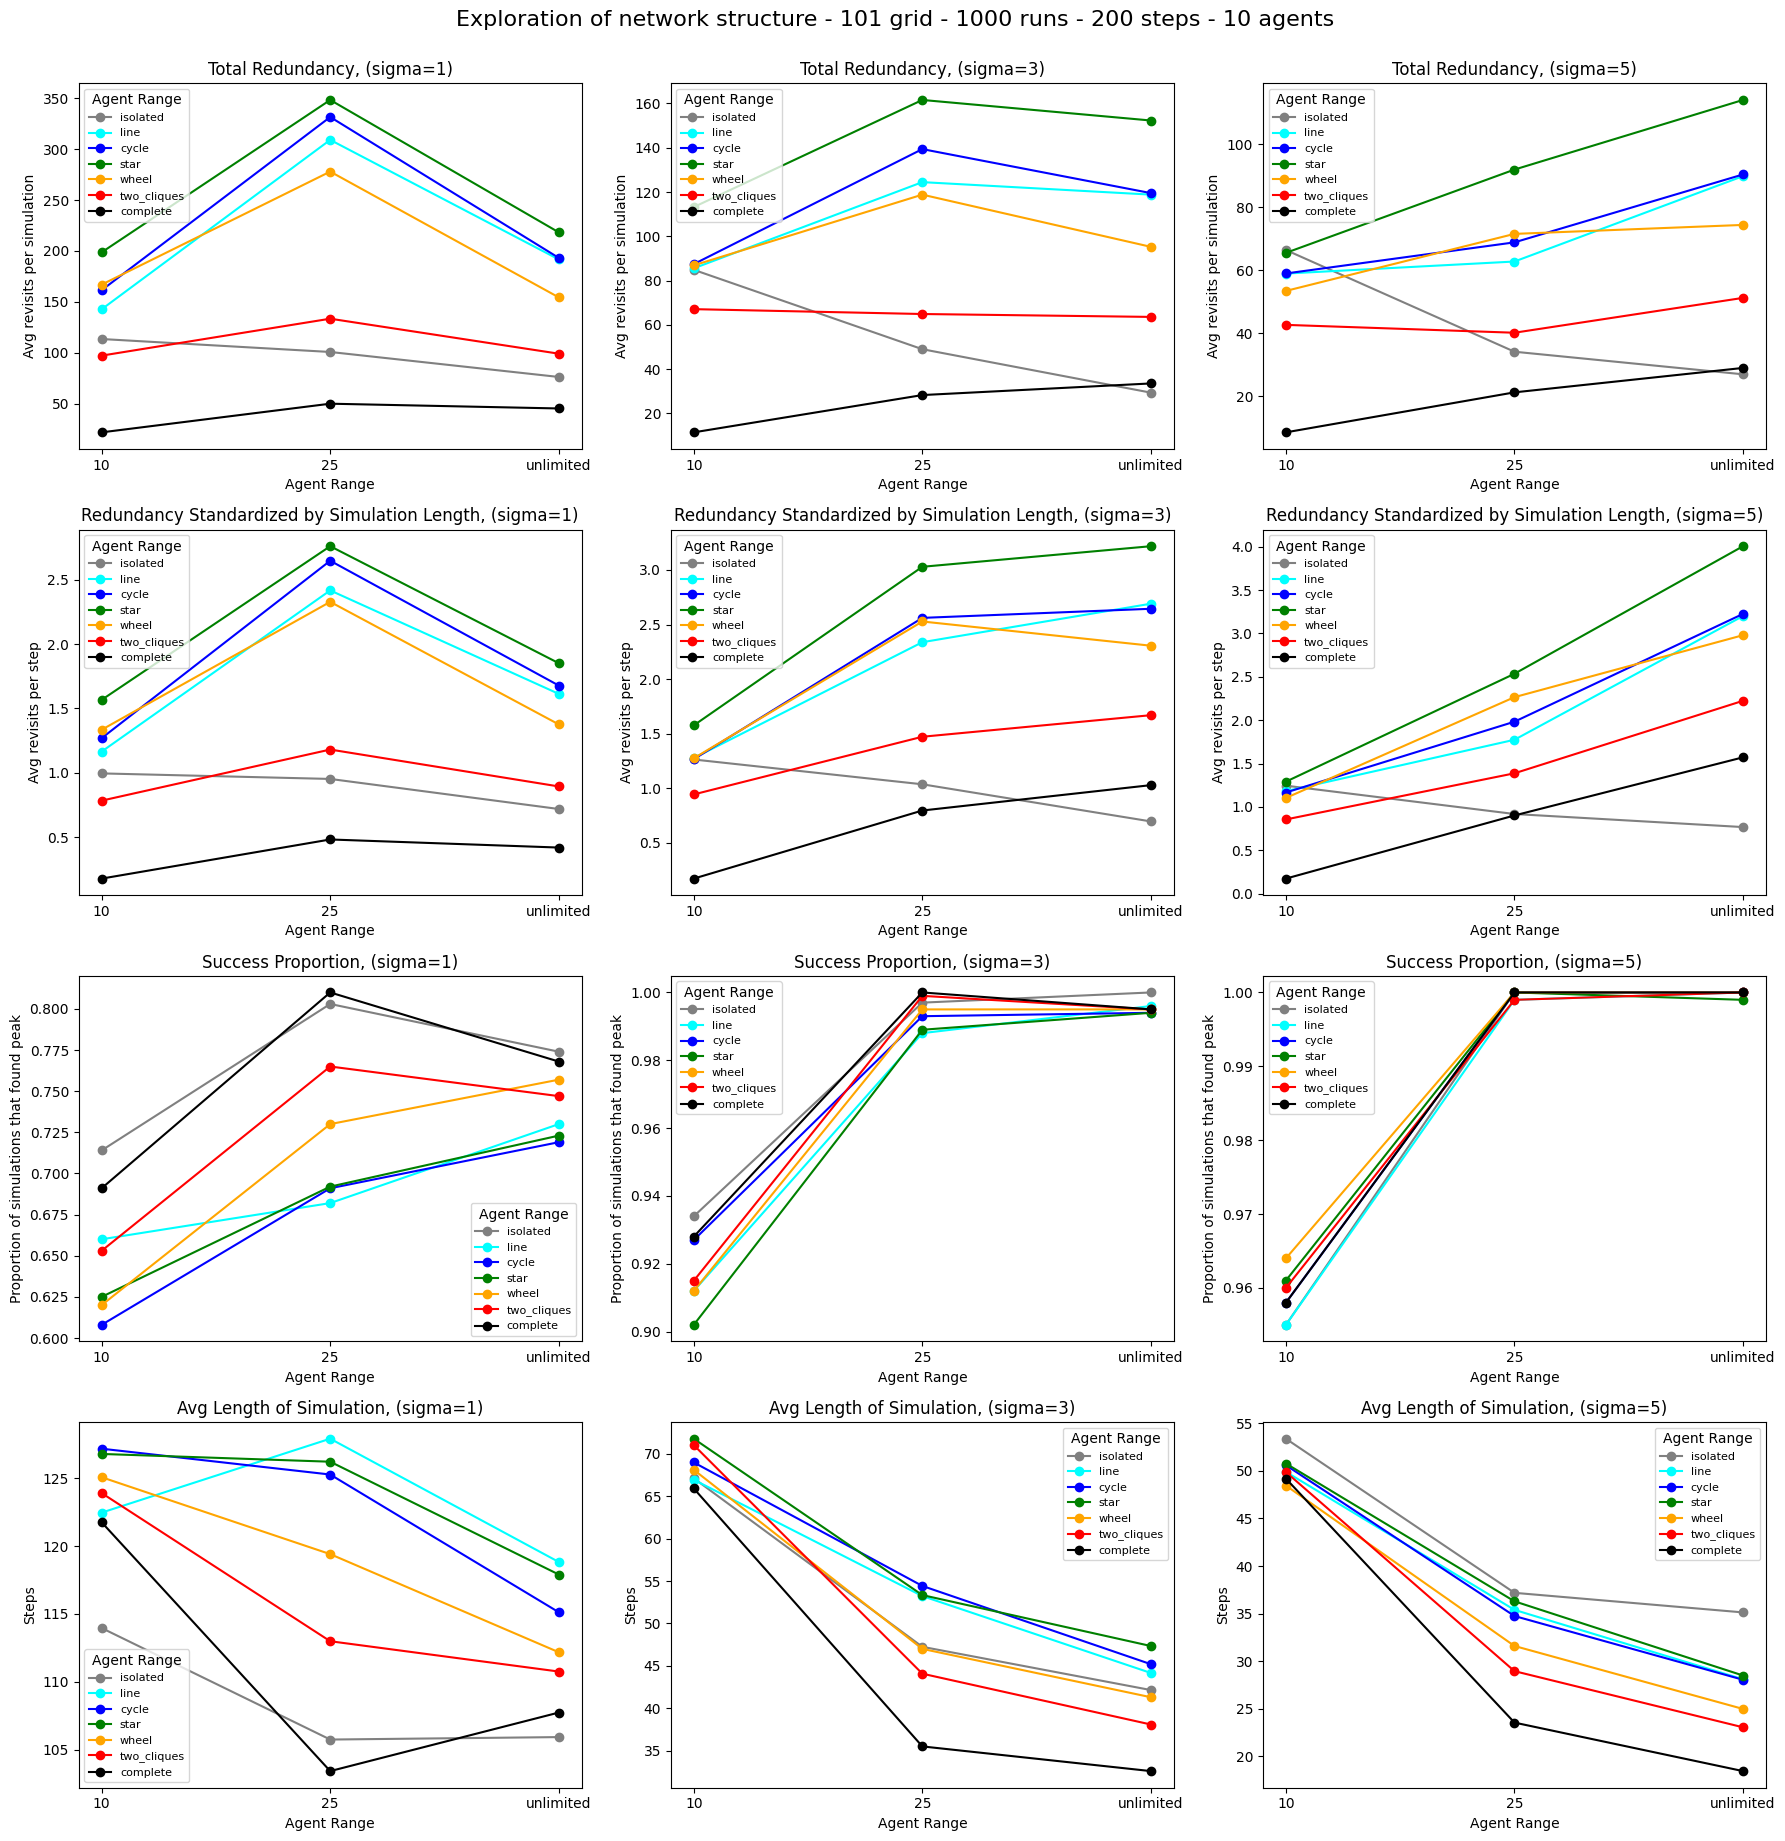

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Load and process the dataset
df0 = pd.read_csv('landscape_results/networkstructure_1000runs_redo.csv')
df0 = process_df(df0)

df1 = df0[df0["sigma"] == 1]
df2 = df0[df0["sigma"] == 3]
df3 = df0[df0["sigma"] == 5]

# Define metrics to plot
metrics = [
    ('redundancy', 'Avg revisits per simulation', 'Total Redundancy'),
    ('redundancy_timeStandardized', 'Avg revisits per step', 'Redundancy Standardized by Simulation Length'),
    ('success_proportion', 'Proportion of simulations that found peak', 'Success Proportion'),
    ('avg_length_of_simulation', 'Steps', 'Avg Length of Simulation'),
]

fig, axes = plt.subplots(len(metrics), 3, figsize=(18, 18))  # 4 rows, 2 columns

for col, df in enumerate([df1, df2, df3]):  # Iterate over both datasets

    for row, (metric, ylabel, title) in enumerate(metrics):  # Iterate over each metric
        ax = axes[row, col]
        
        for ns, c in zip(['isolated', 'line', 'cycle', 'star', 'wheel', 'two_cliques', 'complete'], ['grey', 'cyan', 'blue', 'green', 'orange', 'red', 'black']):
            sub_df = df[(df["network_structure"] == ns)]
            ax.plot(sub_df['agent_range'], sub_df[metric], label=f"{ns}", color=c, marker='o')
        
        ax.set_xlabel("Agent Range")
        ax.set_ylabel(ylabel)
        ax.set_title(title + (", (sigma=1)" if col == 0 else ", (sigma=3)" if col == 1 else ", (sigma=5)"))
        ax.legend(title="Agent Range", fontsize=8)

plt.tight_layout()
fig.suptitle("Exploration of network structure - 101 grid - 1000 runs - 200 steps - 10 agents", fontsize=16, y=1.02)
plt.show()


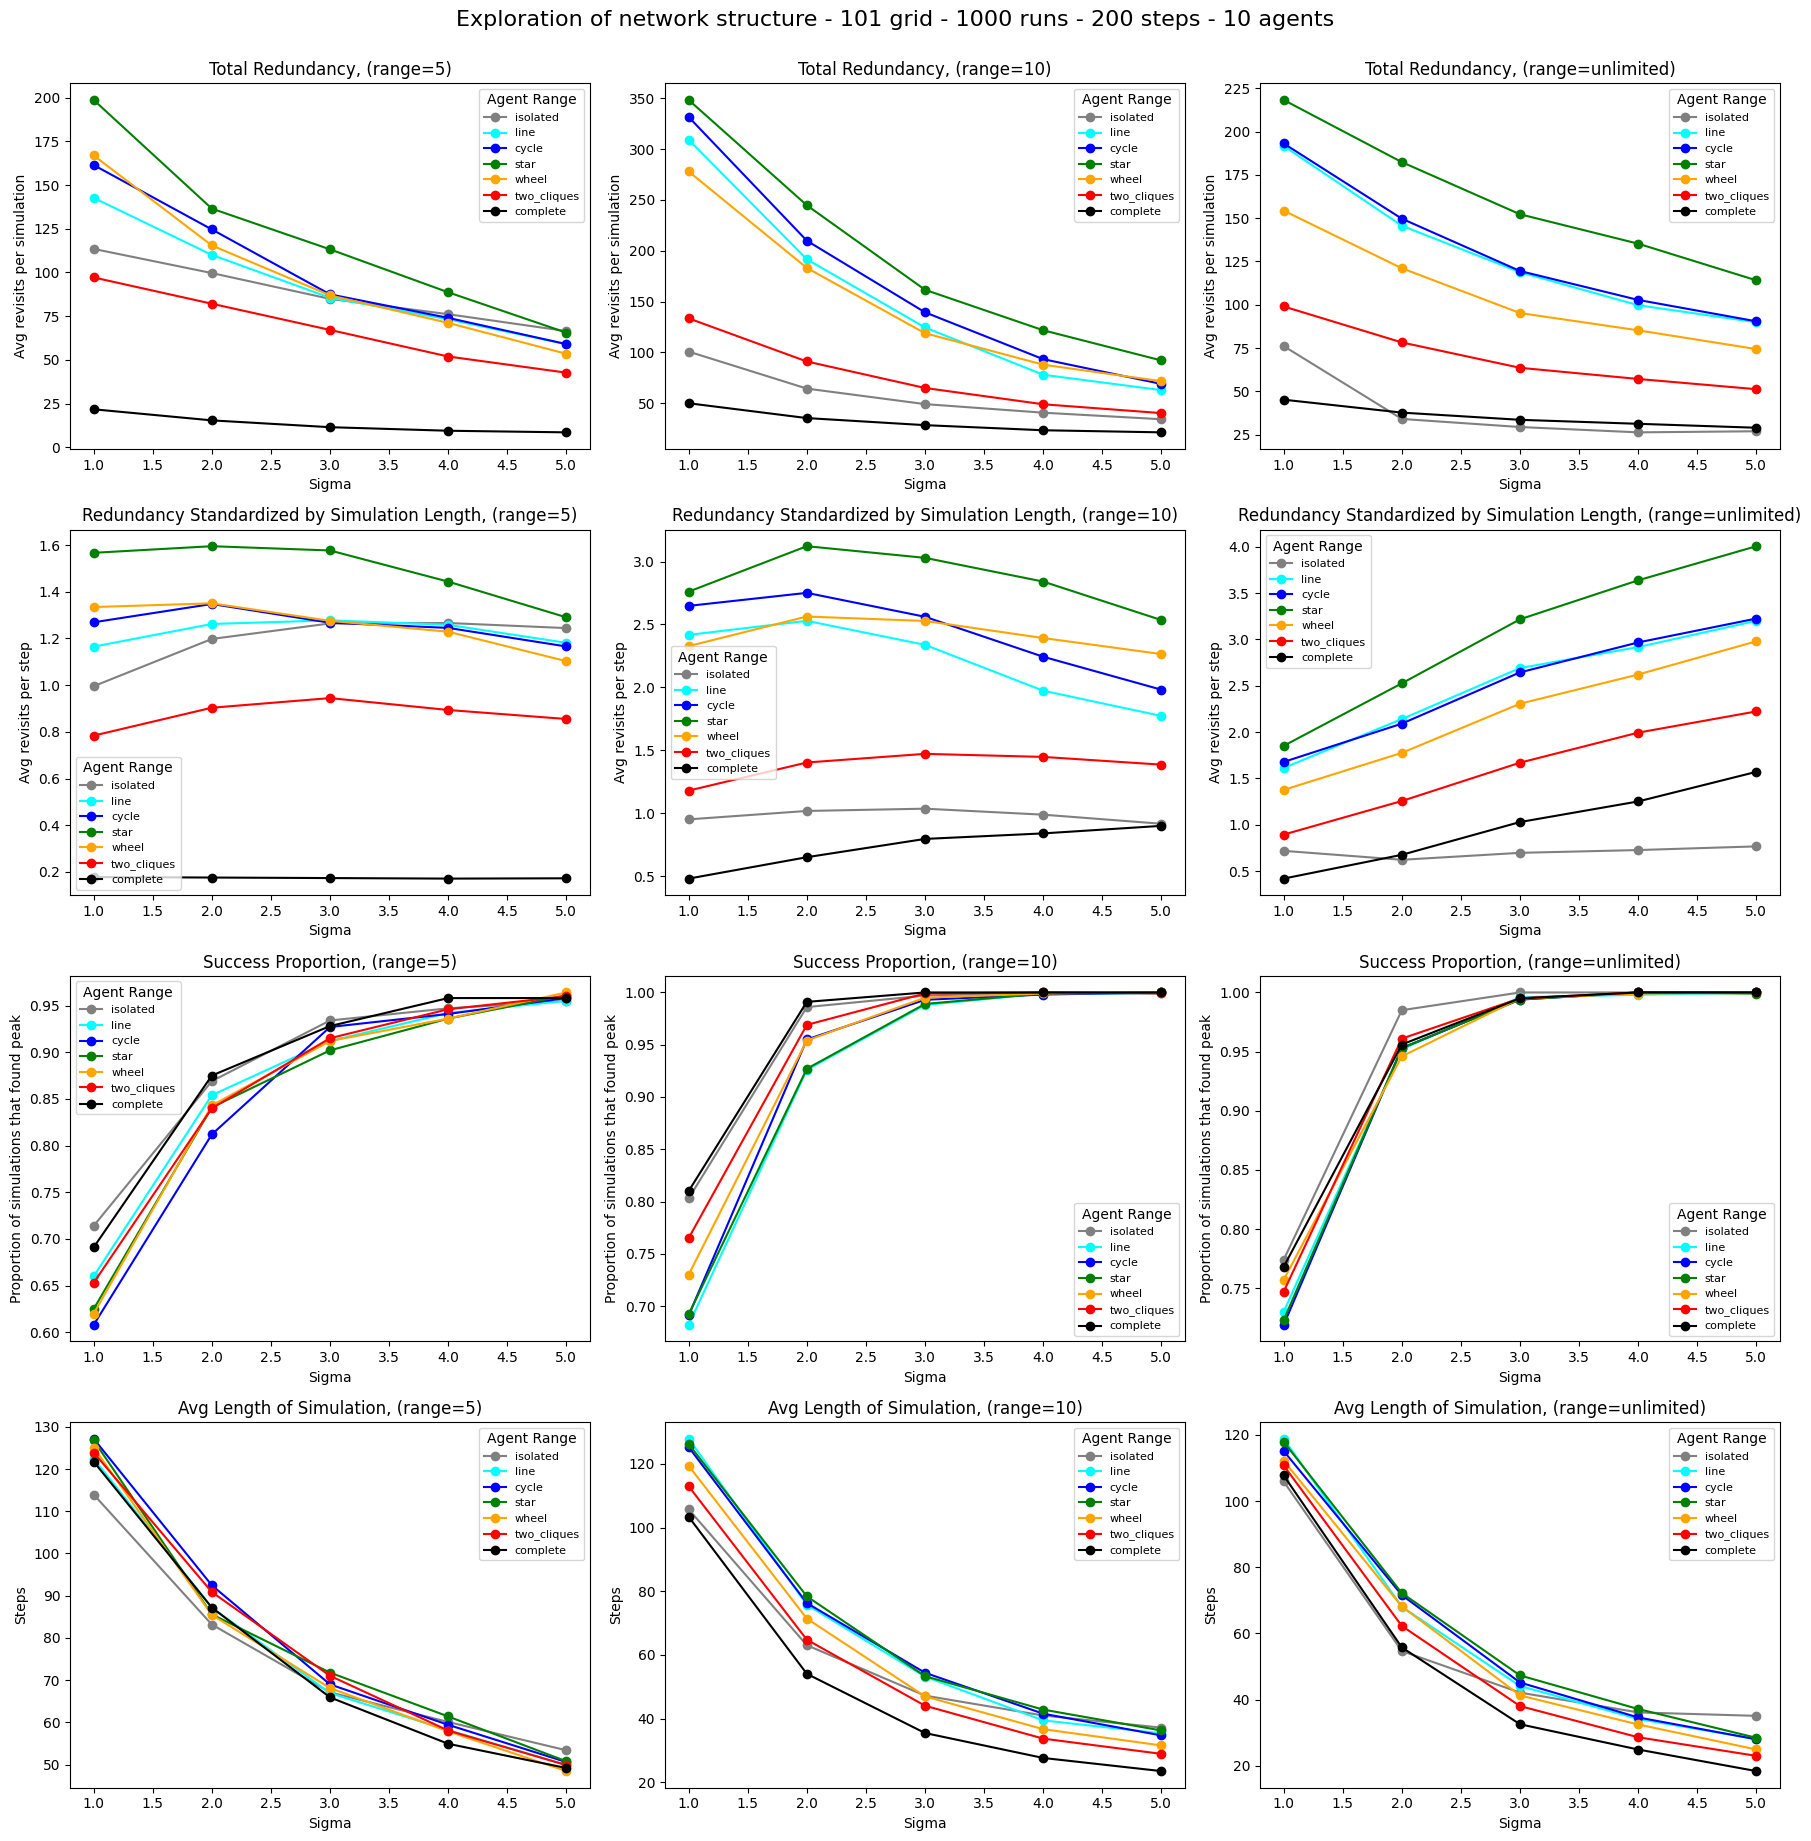

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Load and process the dataset
df0 = pd.read_csv('landscape_results/networkstructure_1000runs_redo.csv')
df0 = process_df(df0)

df1 = df0[df0["agent_range"] == '10']
df2 = df0[df0["agent_range"] == '25']
df3 = df0[df0["agent_range"] == 'unlimited']

# Define metrics to plot
metrics = [
    ('redundancy', 'Avg revisits per simulation', 'Total Redundancy'),
    ('redundancy_timeStandardized', 'Avg revisits per step', 'Redundancy Standardized by Simulation Length'),
    ('success_proportion', 'Proportion of simulations that found peak', 'Success Proportion'),
    ('avg_length_of_simulation', 'Steps', 'Avg Length of Simulation'),
]

fig, axes = plt.subplots(len(metrics), 3, figsize=(18, 18))  # 4 rows, 2 columns

for col, df in enumerate([df1, df2, df3]):  # Iterate over both datasets

    for row, (metric, ylabel, title) in enumerate(metrics):  # Iterate over each metric
        ax = axes[row, col]
        
        for ns, c in zip(['isolated', 'line', 'cycle', 'star', 'wheel', 'two_cliques', 'complete'], ['gray', 'cyan', 'blue', 'green', 'orange', 'red', 'black']):
            sub_df = df[(df["network_structure"] == ns)]
            ax.plot(sub_df['sigma'], sub_df[metric], label=f"{ns}", color=c, marker='o')
        
        ax.set_xlabel("Sigma")
        ax.set_ylabel(ylabel)
        ax.set_title(title + (", (range=5)" if col == 0 else ", (range=10)" if col == 1 else ", (range=unlimited)"))
        ax.legend(title="Agent Range", fontsize=8)

plt.tight_layout()
fig.suptitle("Exploration of network structure - 101 grid - 1000 runs - 200 steps - 10 agents", fontsize=16, y=1.02)
plt.show()


## Epsilon Greedy

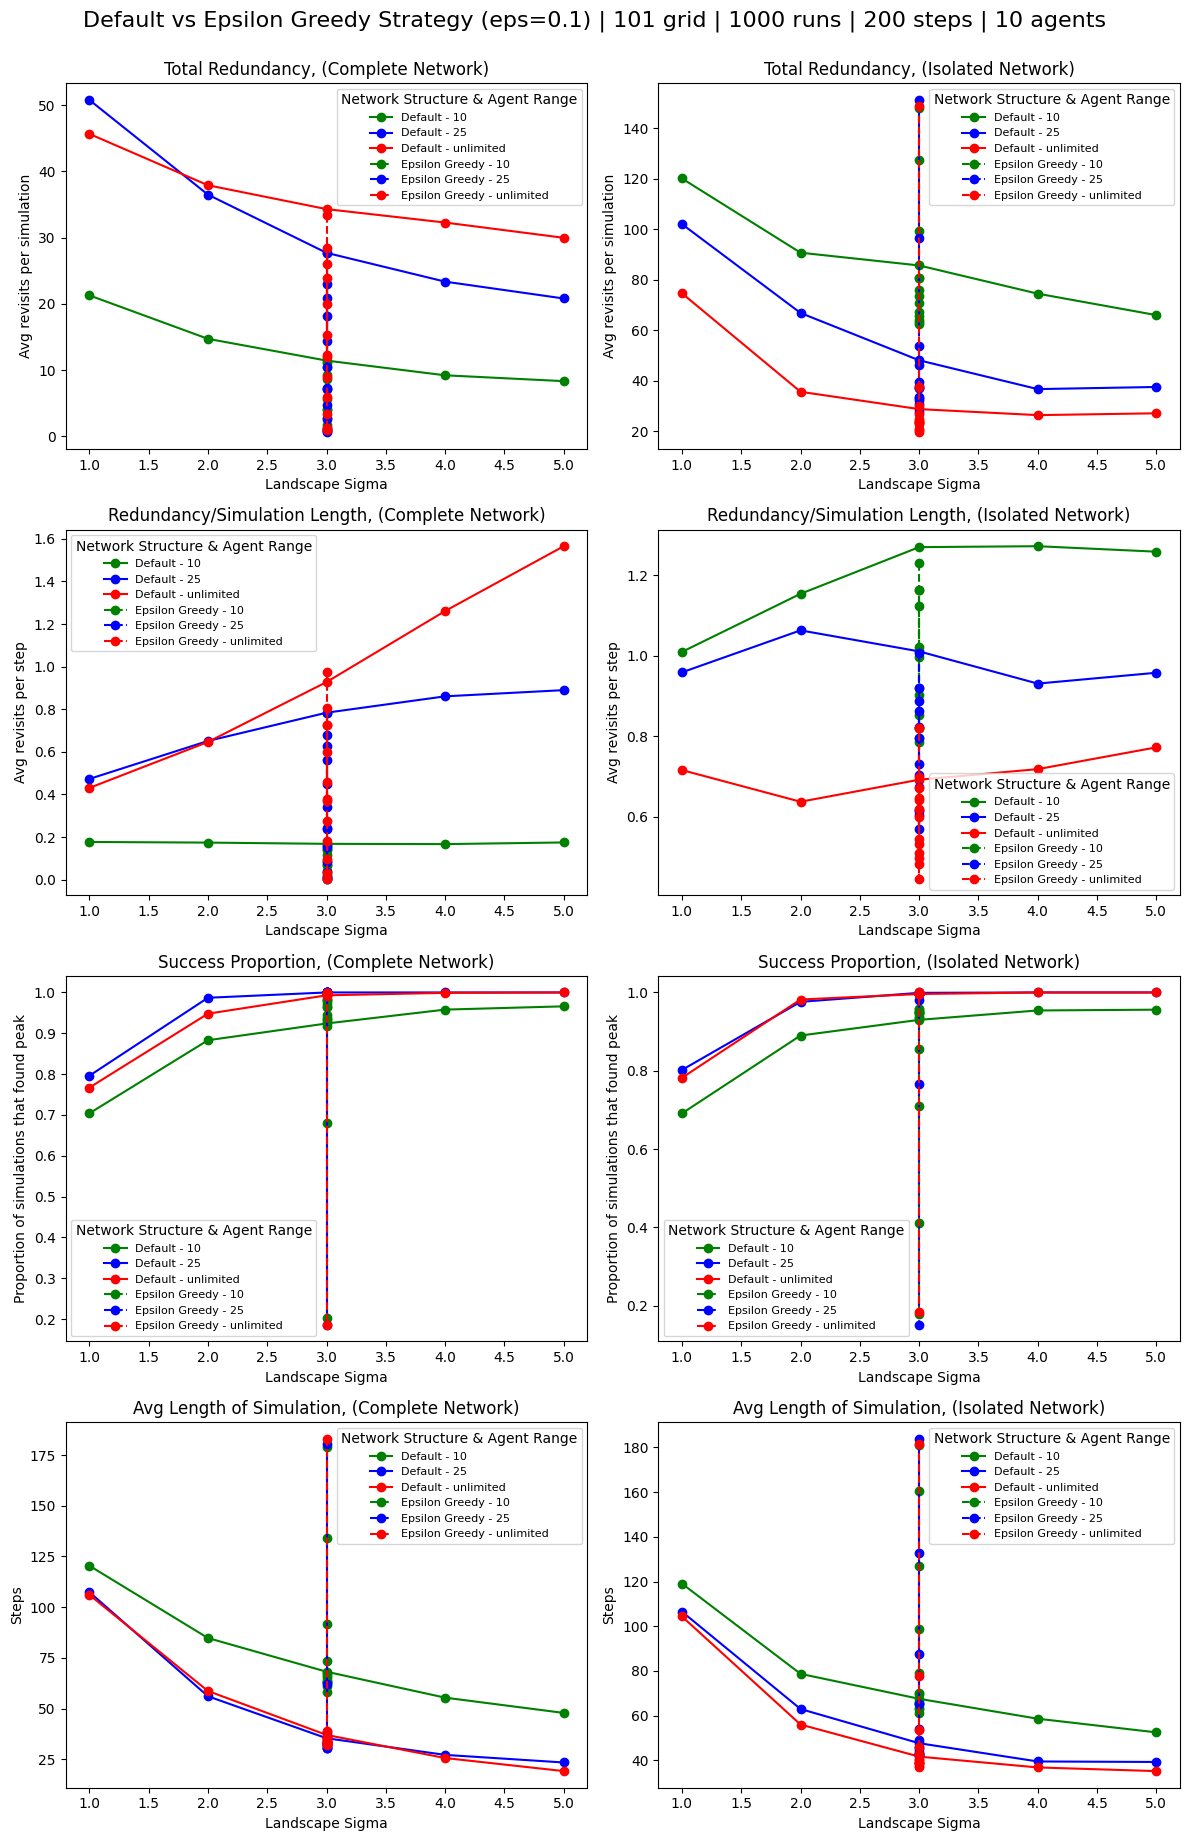

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Load both datasets
df1 = pd.read_csv('landscape_results/range_1000runs_redo.csv')
df1 = process_df(df1)
df1 = df1[df1["agent_range"].isin(['10', '25', 'unlimited'])]

df2 = pd.read_csv('landscape_results/epsilonGreedy_redo.csv')
df2 = process_df(df2)


# Define metrics to plot
metrics = [
    ('redundancy', 'Avg revisits per simulation', 'Total Redundancy'),
    ('redundancy_timeStandardized', 'Avg revisits per step', 'Redundancy/Simulation Length'),
    ('success_proportion', 'Proportion of simulations that found peak', 'Success Proportion'),
    ('avg_length_of_simulation', 'Steps', 'Avg Length of Simulation'),
]

fig, axes = plt.subplots(len(metrics), 2, figsize=(12, 18)) 

for col, ns in enumerate(["complete", "isolated"]):  # Iterate over both datasets
    for row, (metric, ylabel, title) in enumerate(metrics):  # Iterate over each metric
        ax = axes[row, col]
        
        for e, df in enumerate([df1, df2]):
            style = 'solid' if e == 0 else 'dashed'
            #marker = 'o' if e == 0 else "D"
            label = "Epsilon Greedy" if e == 1 else "Default"
            for ar, c in zip(df["agent_range"].unique(), ['green', 'blue', 'red', 'purple', 'orange', 'brown']):
                sub_df = df[(df["network_structure"] == ns) & (df["agent_range"] == ar)]
                ax.plot(sub_df['sigma'], sub_df[metric], label=f"{label} - {ar}", linestyle=style, color=c, marker='o')
        
        ax.set_xlabel("Landscape Sigma")
        ax.set_ylabel(ylabel)
        ax.set_title(title + (", (Complete Network)" if col == 0 else ", (Isolated Network)"))
        ax.legend(title="Network Structure & Agent Range", fontsize=8)

plt.tight_layout()
fig.suptitle("Default vs Epsilon Greedy Strategy (eps=0.1) | 101 grid | 1000 runs | 200 steps | 10 agents", fontsize=16, y=1.02)
plt.show()


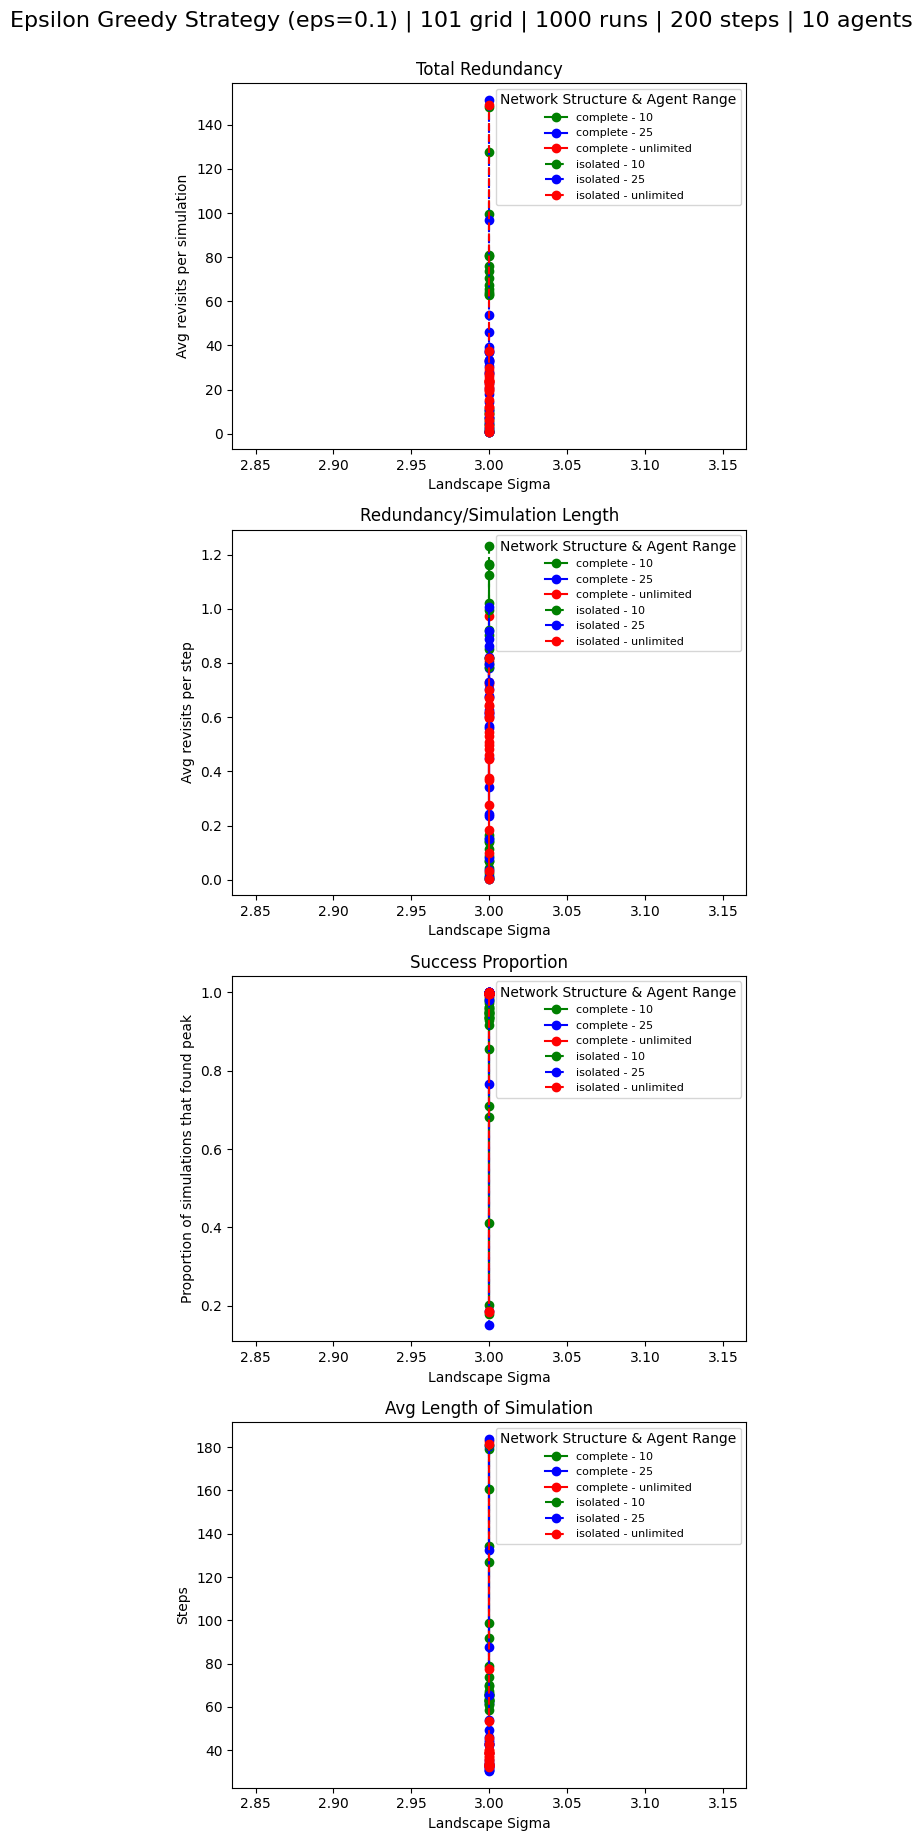

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Load both datasets
df1 = pd.read_csv('landscape_results/range_1000runs_redo.csv')
df1 = process_df(df1)
df1 = df1[df1["agent_range"].isin(['10', '25', 'unlimited'])]

df2 = pd.read_csv('landscape_results/epsilonGreedy_redo.csv')
df2 = process_df(df2)


# Define metrics to plot
metrics = [
    ('redundancy', 'Avg revisits per simulation', 'Total Redundancy'),
    ('redundancy_timeStandardized', 'Avg revisits per step', 'Redundancy/Simulation Length'),
    ('success_proportion', 'Proportion of simulations that found peak', 'Success Proportion'),
    ('avg_length_of_simulation', 'Steps', 'Avg Length of Simulation'),
]

fig, axes = plt.subplots(len(metrics), ncols=1, figsize=(6, 18)) 

for col, df in enumerate([df2]):  # Iterate over both datasets
    for row, (metric, ylabel, title) in enumerate(metrics):  # Iterate over each metric
        ax = axes[row]
        
        for e, ns in enumerate(["complete", "isolated"]):
            style = 'solid' if e == 0 else 'dashed'
            #marker = 'o' if e == 0 else "D"
            label = "Epsilon Greedy" if e == 0 else "Default"
            for ar, c in zip(df["agent_range"].unique(), ['green', 'blue', 'red', 'purple', 'orange', 'brown']):
                sub_df = df[(df["network_structure"] == ns) & (df["agent_range"] == ar)]
                ax.plot(sub_df['sigma'], sub_df[metric], label=f"{ns} - {ar}", linestyle=style, color=c, marker='o')
        
        ax.set_xlabel("Landscape Sigma")
        ax.set_ylabel(ylabel)
        ax.set_title(title + ("" if col == 0 else ", (Isolated Network)"))
        ax.legend(title="Network Structure & Agent Range", fontsize=8)

plt.tight_layout()
fig.suptitle("Epsilon Greedy Strategy (eps=0.1) | 101 grid | 1000 runs | 200 steps | 10 agents", fontsize=16, y=1.02)
plt.show()


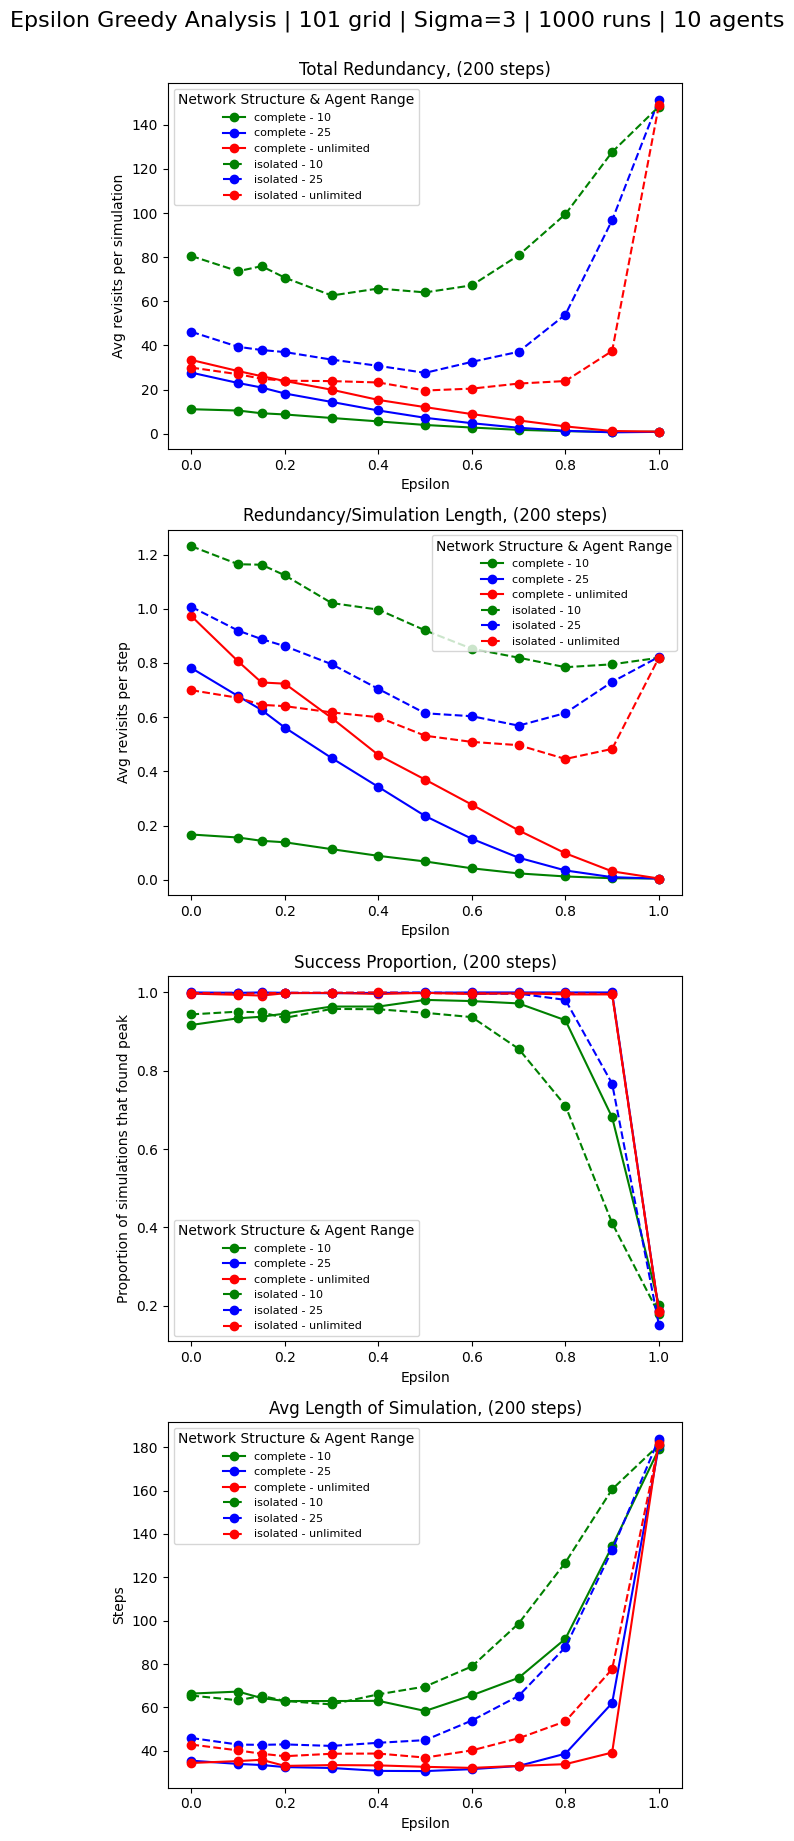

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# Load both datasets
# df01 = pd.read_csv('landscape_results/epsilonGreedy_epsilon_1000runs.csv')
# df01 = process_df(df01)

# df02 = pd.read_csv('landscape_results/epsilonGreedy_epsilon_cont_1000runs.csv')
# df02 = process_df(df02)

# df0 = pd.concat([df01, df02], ignore_index=True)
df0 = pd.read_csv('landscape_results/epsilonGreedy_redo.csv')
df0 = process_df(df0)

df0 = df0.drop(df0.index[6:12])

df1 = df0[df0["num_timesteps"] == 100]
df2 = df0[df0["num_timesteps"] == 200]

# Define metrics to plot
metrics = [
    ('redundancy', 'Avg revisits per simulation', 'Total Redundancy'),
    ('redundancy_timeStandardized', 'Avg revisits per step', 'Redundancy/Simulation Length'),
    ('success_proportion', 'Proportion of simulations that found peak', 'Success Proportion'),
    ('avg_length_of_simulation', 'Steps', 'Avg Length of Simulation'),
]

fig, axes = plt.subplots(len(metrics), ncols=1, figsize=(6, 18)) 

for col, df in enumerate([df2]):  # Iterate over both datasets
    for row, (metric, ylabel, title) in enumerate(metrics):  # Iterate over each metric
        ax = axes[row]
        
        for e, ns in enumerate(["complete", "isolated"]):
            style = 'solid' if e == 0 else 'dashed'
            label = "Epsilon Greedy" if e == 0 else "Default"
            for ar, c in zip(df["agent_range"].unique(), ['green', 'blue', 'red', 'purple', 'orange', 'brown']):
                sub_df = df[(df["network_structure"] == ns) & (df["agent_range"] == ar)]
                ax.plot(sub_df['epsilon'], sub_df[metric], label=f"{ns} - {ar}", linestyle=style, color=c, marker='o')
        
        ax.set_xlabel("Epsilon")
        ax.set_ylabel(ylabel)
        ax.set_title(title + (", (100 steps)" if col == 1 else ", (200 steps)"))
        ax.legend(title="Network Structure & Agent Range", fontsize=8)

plt.tight_layout()
fig.suptitle("Epsilon Greedy Analysis | 101 grid | Sigma=3 | 1000 runs | 10 agents", fontsize=16, y=1.02)
plt.show()


## 3d Landscape

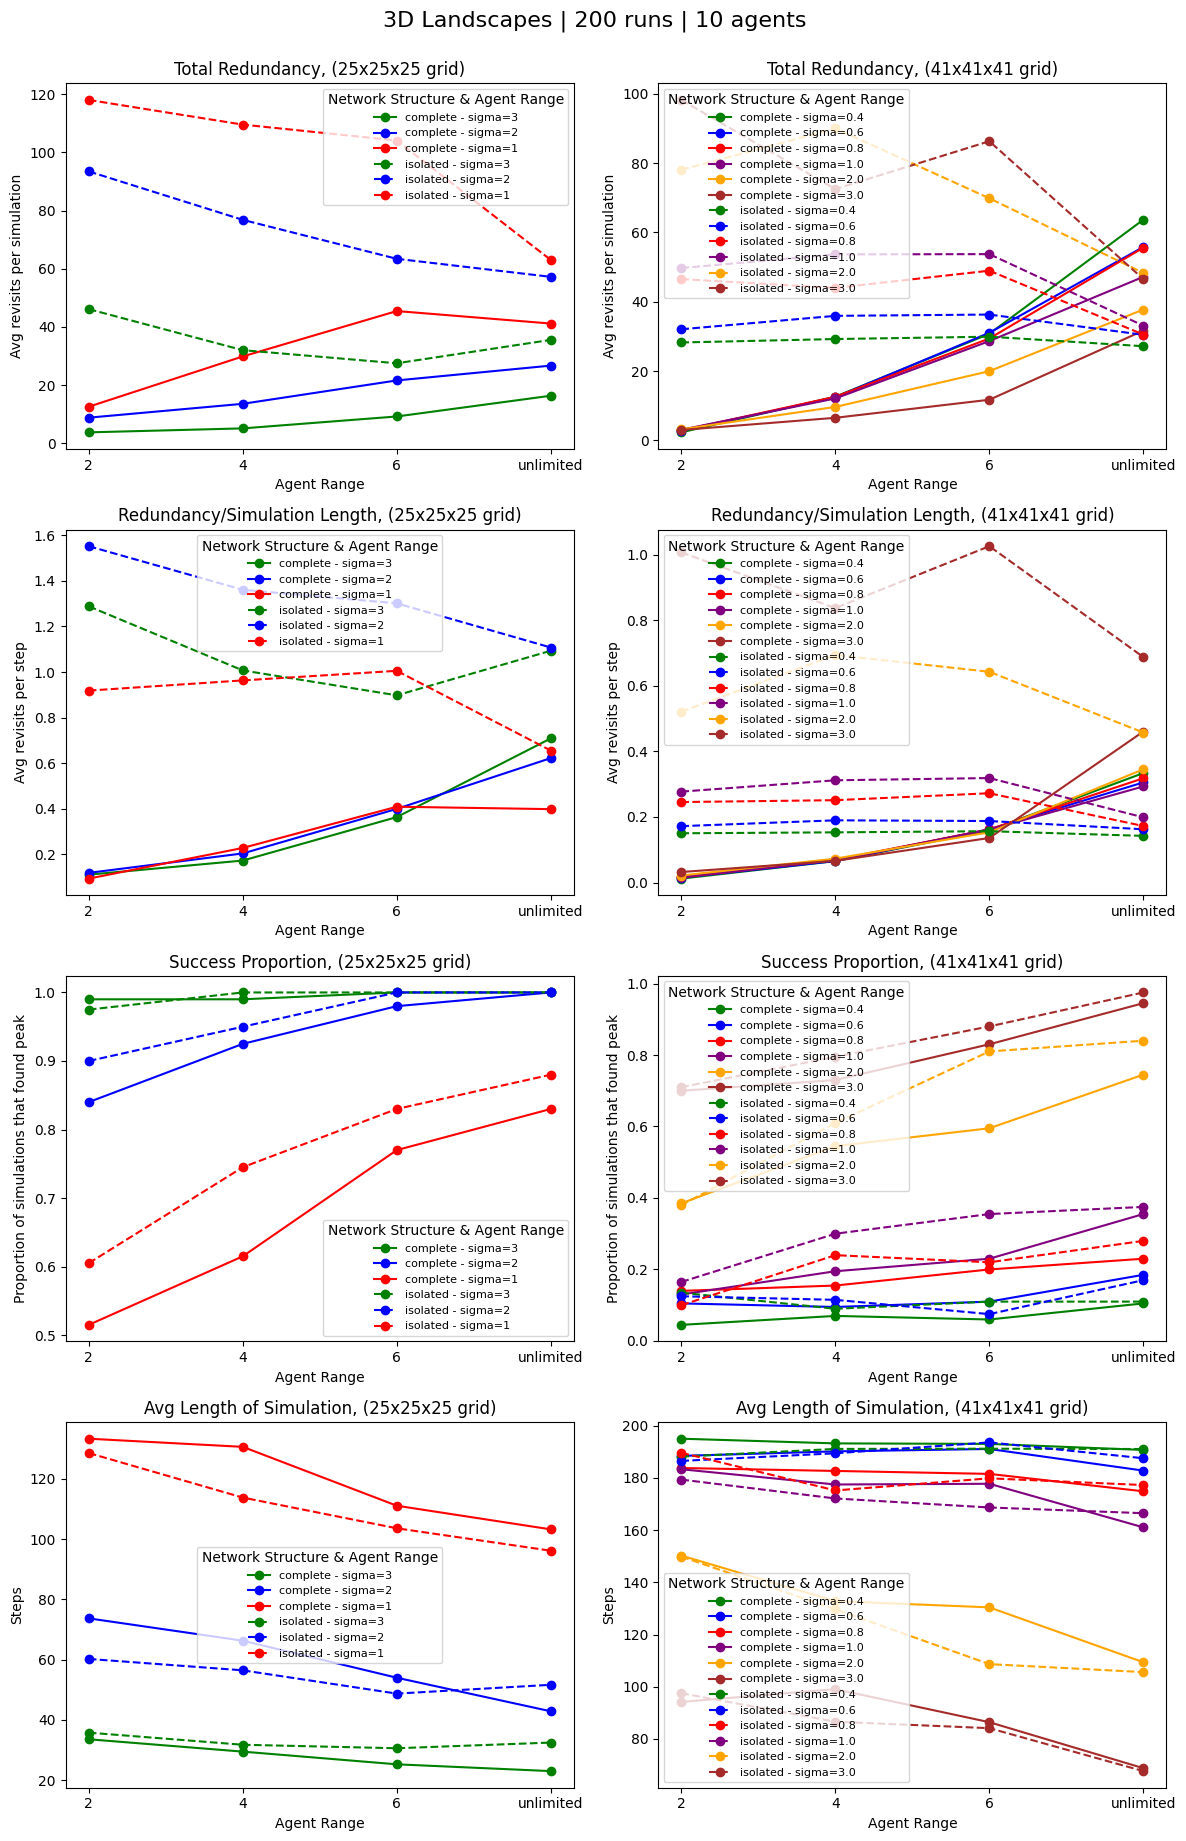

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Load both datasets
df1 = pd.read_csv('landscape_results/basic_3d_landscape.csv')
df1 = process_df(df1)

df2 = pd.read_csv('landscape_results/basic_3d_landscape_41grid_extra.csv')
df2 = process_df(df2)


# Define metrics to plot
metrics = [
    ('redundancy', 'Avg revisits per simulation', 'Total Redundancy'),
    ('redundancy_timeStandardized', 'Avg revisits per step', 'Redundancy/Simulation Length'),
    ('success_proportion', 'Proportion of simulations that found peak', 'Success Proportion'),
    ('avg_length_of_simulation', 'Steps', 'Avg Length of Simulation'),
]

fig, axes = plt.subplots(len(metrics), ncols=2, figsize=(12, 18)) 

for col, df in enumerate([df1, df2]):  # Iterate over both datasets
    for row, (metric, ylabel, title) in enumerate(metrics):  # Iterate over each metric
        ax = axes[row, col]
        
        for e, ns in enumerate(["complete", "isolated"]):
            style = 'solid' if e == 0 else 'dashed'
            label = "Epsilon Greedy" if e == 0 else "Default"
            for sigma, c in zip(df["sigma"].unique(), ['green', 'blue', 'red', 'purple', 'orange', 'brown']):
                sub_df = df[(df["network_structure"] == ns) & (df["sigma"] == sigma)]
                ax.plot(sub_df['agent_range'], sub_df[metric], label=f"{ns} - sigma={sigma}", linestyle=style, color=c, marker='o')
        
        ax.set_xlabel("Agent Range")
        ax.set_ylabel(ylabel)
        ax.set_title(title + (", (25x25x25 grid)" if col == 0 else ", (41x41x41 grid)"))
        ax.legend(title="Network Structure & Agent Range", fontsize=8)

plt.tight_layout()
fig.suptitle("3D Landscapes | 200 runs | 10 agents", fontsize=16, y=1.02)
plt.show()


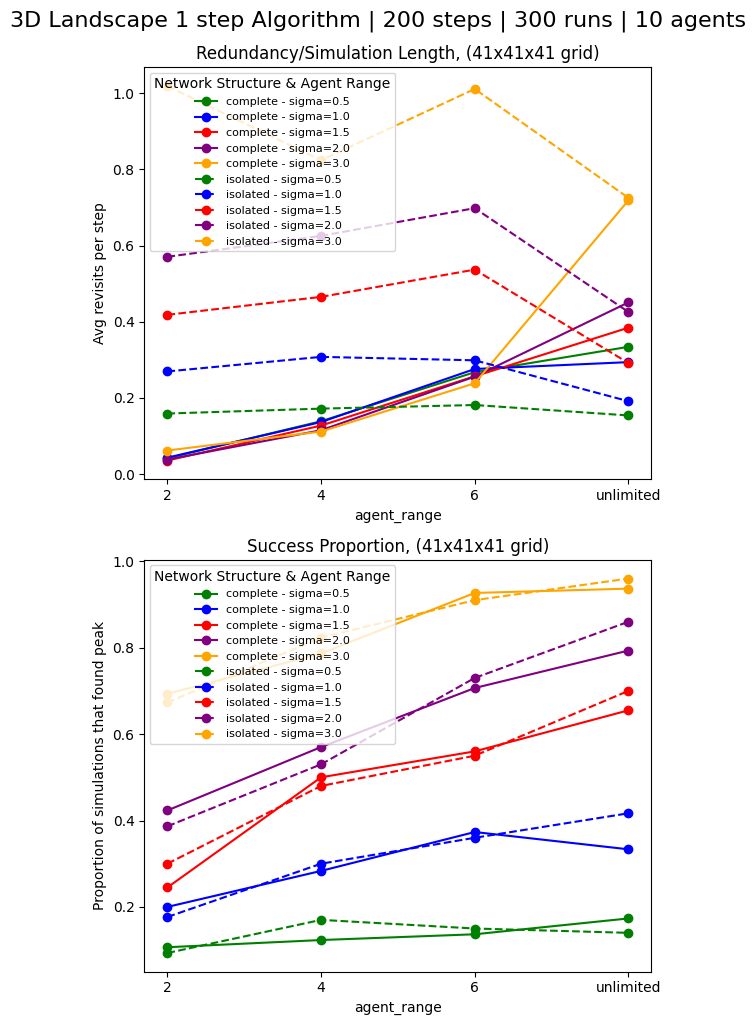

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

x_axis = "agent_range"
z_axis = "sigma" if x_axis == "agent_range" else "agent_range"

df_15 = pd.read_csv('landscape_results/3d_landscape_1step.csv')
df_15 = process_df(df_15)

# Load both datasets
df0 = pd.read_csv('landscape_results/3d_landscape_1step_allSigma_41grid.csv')
df0 = process_df(df0)

df0 = pd.concat([df0, df_15], ignore_index=True).sort_values(by=["sigma", "agent_range"])

df1 = df0[df0["grid_size"].isin([25])]
df2 = df0[df0["grid_size"].isin([41])]


# Define metrics to plot
metrics = [
    ('redundancy_timeStandardized', 'Avg revisits per step', 'Redundancy/Simulation Length'),
    ('success_proportion', 'Proportion of simulations that found peak', 'Success Proportion'),
]

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(6, 10)) 

for col, df in enumerate([df2]):  # Iterate over both datasets
    for row, (metric, ylabel, title) in enumerate(metrics):  # Iterate over each metric
        ax = axes[row]
        
        for e, ns in enumerate(["complete", "isolated"]):
            style = 'solid' if e == 0 else 'dashed'
            label = "none"

            for z, c in zip(df[z_axis].unique(), ['green', 'blue', 'red', 'purple', 'orange', 'brown']):
                sub_df = df[(df["network_structure"] == ns) & (df[z_axis] == z)]
                ax.plot(sub_df[x_axis], sub_df[metric], label=f"{ns} - {z_axis}={z}", linestyle=style, color=c, marker='o')
        
        ax.set_xlabel(x_axis)
        ax.set_ylabel(ylabel)
        ax.set_title(title + (", (25x25x25 grid)" if col == 1 else ", (41x41x41 grid)"))
        ax.legend(title="Network Structure & Agent Range", fontsize=8)

plt.tight_layout()
fig.suptitle("3D Landscape 1 step Algorithm | 200 steps | 300 runs | 10 agents", fontsize=16, y=1.02)
plt.show()
